# HEMANG MALIK(220968092)

Name:Hemang Malik
Batch:A1
Section:III Sem A section
Reg no:220968092

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
df = pd.read_excel("Online Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
df['datestamp']=pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datestamp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00


In [4]:
df2 = df.loc[(df['datestamp'] >= '2011-04-01')
                     & (df['datestamp'] <= '2011-12-10')]
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datestamp
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,2011-04-01 08:22:00
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,2011-04-01 08:22:00
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,2011-04-01 08:22:00
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,2011-04-01 08:22:00
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,2011-04-01 08:22:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00


In [5]:
df2.reset_index(inplace=True)
df2

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datestamp
0,142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,2011-04-01 08:22:00
1,142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,2011-04-01 08:22:00
2,142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,2011-04-01 08:22:00
3,142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,2011-04-01 08:22:00
4,142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,2011-04-01 08:22:00
...,...,...,...,...,...,...,...,...,...,...
399821,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00
399822,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00
399823,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
399824,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00


In [6]:
df3 = df2.drop(columns = ['index'],axis=1)
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datestamp
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,2011-04-01 08:22:00
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,2011-04-01 08:22:00
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,2011-04-01 08:22:00
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,2011-04-01 08:22:00
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,2011-04-01 08:22:00
...,...,...,...,...,...,...,...,...,...
399821,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00
399822,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00
399823,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
399824,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00


In [7]:
# R (Recency completed)
df10=df3.groupby(by='CustomerID').last()
df10['Recency']=df10.datestamp.dt.month
d = {12:0,11:1,10:2,9:3,8:4,7:5,6:6,5:7,4:8,3:9,2:10,1:11}
df10.update(df10.Recency.map(d))
df10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,datestamp,Recency
CustomerID,,,,,,,,,
12347.0,581180,23508,MINI PLAYING CARDS DOLLY GIRL,20,2011-12-07 15:52:00,0.42,Iceland,2011-12-07 15:52:00,0
12348.0,568172,POST,POSTAGE,1,2011-09-25 13:13:00,40.00,Finland,2011-09-25 13:13:00,3
12349.0,577609,POST,POSTAGE,1,2011-11-21 09:51:00,300.00,Italy,2011-11-21 09:51:00,1
12352.0,574275,POST,POSTAGE,2,2011-11-03 14:37:00,40.00,Norway,2011-11-03 14:37:00,1
12353.0,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19 17:47:00,2.95,Bahrain,2011-05-19 17:47:00,7
...,...,...,...,...,...,...,...,...,...
18278.0,568492,22595,GINGHAM HEART DECORATION,12,2011-09-27 11:58:00,0.85,United Kingdom,2011-09-27 11:58:00,3
18281.0,556464,22467,GUMBALL COAT RACK,6,2011-06-12 10:53:00,2.55,United Kingdom,2011-06-12 10:53:00,6
18282.0,580173,23175,REGENCY MILK JUG PINK,4,2011-12-02 11:43:00,3.25,United Kingdom,2011-12-02 11:43:00,0


In [9]:
## F (frequency value incomplete)
df4=df3.groupby(by='CustomerID').InvoiceNo.unique().reset_index(name="counts")
df4

,CustomerID,counts
0,12347.0,"[549222, 556201, 562032, 573511, 581180]"
1,12348.0,"[548955, 568172]"
2,12349.0,[577609]
3,12352.0,"[567505, 568699, 574275]"
4,12353.0,[553900]
...,...,...
3870,18278.0,[568492]
3871,18281.0,[556464]
3872,18282.0,"[562525, C562808, 580173]"
3873,18283.0,"[550957, 554157, 556731, 557956, 560025, 56003..."


In [10]:
df4["counts"].astype(str)

0                    [549222 556201 562032 573511 581180]
1                                         [548955 568172]
2                                                [577609]
3                                  [567505 568699 574275]
4                                                [553900]
                              ...                        
3870                                             [568492]
3871                                             [556464]
3872                            [562525 'C562808' 580173]
3873    [550957 554157 556731 557956 560025 560032 565...
3874                               [554065 570715 573167]
Name: counts, Length: 3875, dtype: object

In [11]:
def count_words(input_string):
   
    input_string = str(input_string)
    
    word_count = 0
    
    for char in input_string:
        if char.isspace() or char in [',', '.', '!', '?', ';', ':']:
            word_count += 1
    
    
    word_count += 1
    
    return word_count

df4["Frequency"] = df4["counts"].apply(count_words)
df4

,CustomerID,counts,Frequency
0,12347.0,"[549222, 556201, 562032, 573511, 581180]",5
1,12348.0,"[548955, 568172]",2
2,12349.0,[577609],1
3,12352.0,"[567505, 568699, 574275]",3
4,12353.0,[553900],1
...,...,...,...
3870,18278.0,[568492],1
3871,18281.0,[556464],1
3872,18282.0,"[562525, C562808, 580173]",3
3873,18283.0,"[550957, 554157, 556731, 557956, 560025, 56003...",14


In [15]:
## M (Monetary value completed)
df3['total'] = (df3['Quantity'])*(df3['UnitPrice'])                             
df10['monetary']=df3.groupby(by='CustomerID').total.sum()
df10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,datestamp,Recency,monetary
CustomerID,,,,,,,,,,
12347.0,581180,23508,MINI PLAYING CARDS DOLLY GIRL,20,2011-12-07 15:52:00,0.42,Iceland,2011-12-07 15:52:00,0,3122.82
12348.0,568172,POST,POSTAGE,1,2011-09-25 13:13:00,40.00,Finland,2011-09-25 13:13:00,3,677.00
12349.0,577609,POST,POSTAGE,1,2011-11-21 09:51:00,300.00,Italy,2011-11-21 09:51:00,1,1757.55
12352.0,574275,POST,POSTAGE,2,2011-11-03 14:37:00,40.00,Norway,2011-11-03 14:37:00,1,944.23
12353.0,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19 17:47:00,2.95,Bahrain,2011-05-19 17:47:00,7,89.00
...,...,...,...,...,...,...,...,...,...,...
18278.0,568492,22595,GINGHAM HEART DECORATION,12,2011-09-27 11:58:00,0.85,United Kingdom,2011-09-27 11:58:00,3,173.90
18281.0,556464,22467,GUMBALL COAT RACK,6,2011-06-12 10:53:00,2.55,United Kingdom,2011-06-12 10:53:00,6,80.82
18282.0,580173,23175,REGENCY MILK JUG PINK,4,2011-12-02 11:43:00,3.25,United Kingdom,2011-12-02 11:43:00,0,176.60


In [17]:
dfmain=pd.merge(df4,df10,on="CustomerID",how="left")
dfmain

,CustomerID,counts,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,datestamp,Recency,monetary
0,12347.0,"[549222, 556201, 562032, 573511, 581180]",5,581180,23508,MINI PLAYING CARDS DOLLY GIRL,20,2011-12-07 15:52:00,0.42,Iceland,2011-12-07 15:52:00,0,3122.82
1,12348.0,"[548955, 568172]",2,568172,POST,POSTAGE,1,2011-09-25 13:13:00,40.00,Finland,2011-09-25 13:13:00,3,677.00
2,12349.0,[577609],1,577609,POST,POSTAGE,1,2011-11-21 09:51:00,300.00,Italy,2011-11-21 09:51:00,1,1757.55
3,12352.0,"[567505, 568699, 574275]",3,574275,POST,POSTAGE,2,2011-11-03 14:37:00,40.00,Norway,2011-11-03 14:37:00,1,944.23
4,12353.0,[553900],1,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19 17:47:00,2.95,Bahrain,2011-05-19 17:47:00,7,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,18278.0,[568492],1,568492,22595,GINGHAM HEART DECORATION,12,2011-09-27 11:58:00,0.85,United Kingdom,2011-09-27 11:58:00,3,173.90
3871,18281.0,[556464],1,556464,22467,GUMBALL COAT RACK,6,2011-06-12 10:53:00,2.55,United Kingdom,2011-06-12 10:53:00,6,80.82
3872,18282.0,"[562525, C562808, 580173]",3,580173,23175,REGENCY MILK JUG PINK,4,2011-12-02 11:43:00,3.25,United Kingdom,2011-12-02 11:43:00,0,176.60
3873,18283.0,"[550957, 554157, 556731, 557956, 560025, 56003...",14,580872,23344,JUMBO BAG 50'S CHRISTMAS,10,2011-12-06 12:02:00,2.08,United Kingdom,2011-12-06 12:02:00,0,1776.98


In [18]:
dff=dfmain[["Frequency","Recency","monetary"]]
dff

,Frequency,Recency,monetary
0,5,0,3122.82
1,2,3,677.00
2,1,1,1757.55
3,3,1,944.23
4,1,7,89.00
...,...,...,...
3870,1,3,173.90
3871,1,6,80.82
3872,3,0,176.60
3873,14,0,1776.98


<AxesSubplot:>

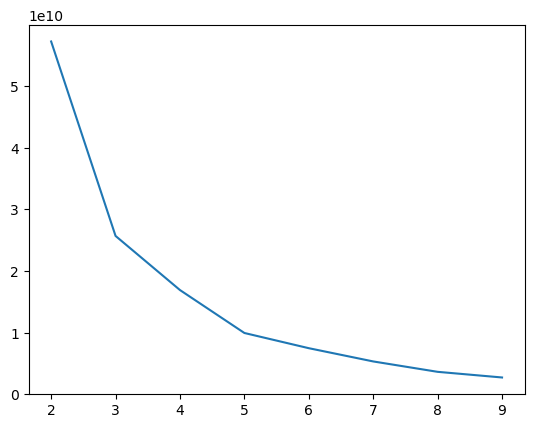

In [19]:
wccs={}
for k in range(2,10):
    m = KMeans(n_clusters=k)
    m.fit(dff)
    wccs[k]=m.inertia_
sns.lineplot(x=wccs.keys(),y=wccs.values())

In [20]:
X=dff
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

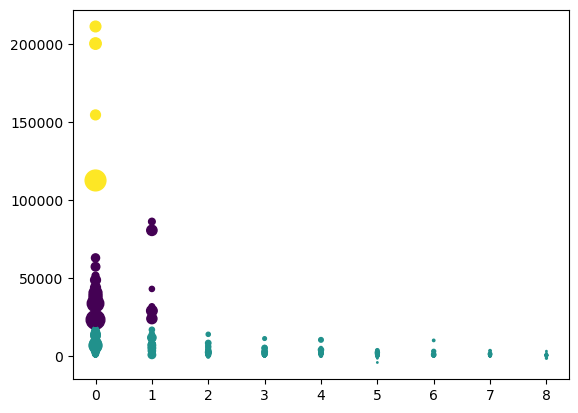

In [24]:
plt.scatter(dff['Recency'],dff['monetary'],dff["Frequency"],c=kmeans.labels_)
plt.show()

C:\Users\mca\AppData\Local\Temp\ipykernel_7352\2915494636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['labels'] = kmeans.labels_


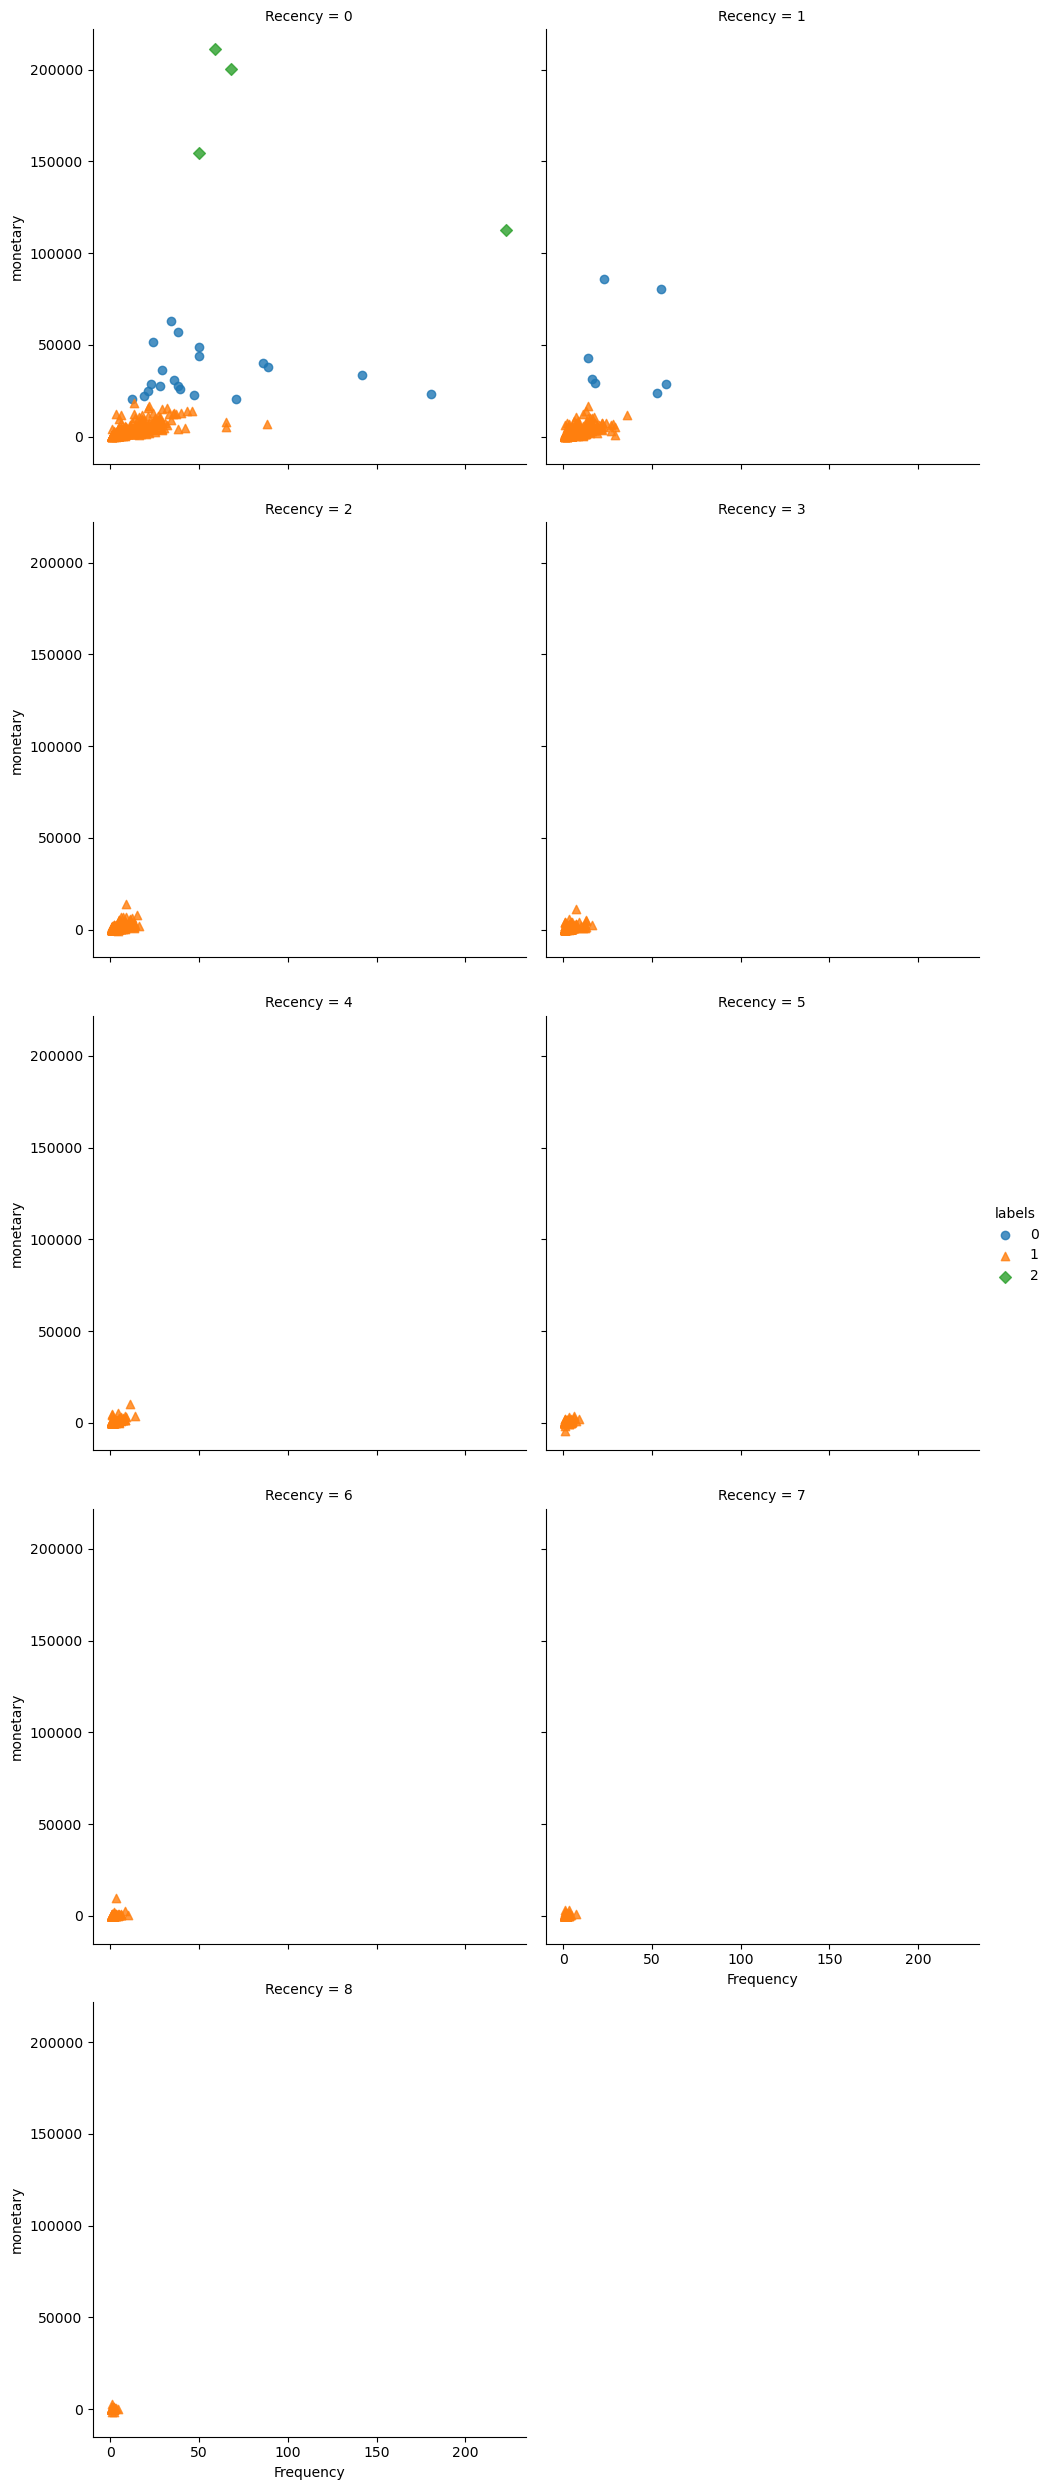

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(dff[['Recency', 'Frequency', 'monetary']])
dff['labels'] = kmeans.labels_
sns.lmplot(x='Frequency', y='monetary', col='Recency', hue='labels', data=dff, col_wrap=2, fit_reg=False, markers=['o', '^', 'D'])